In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D,concatenate
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers,models,layers,Model
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from skimage import io
from skimage.feature import local_binary_pattern
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray
import keras
import matplotlib.image as mpimg
from PIL import Image
import cv2

In [2]:
image1 = cv2.imread('Chest CT-Scan images Dataset/Data/train/cancer/0.png')

In [3]:
type(image1)

numpy.ndarray

In [4]:
image1.shape

(264, 409, 3)

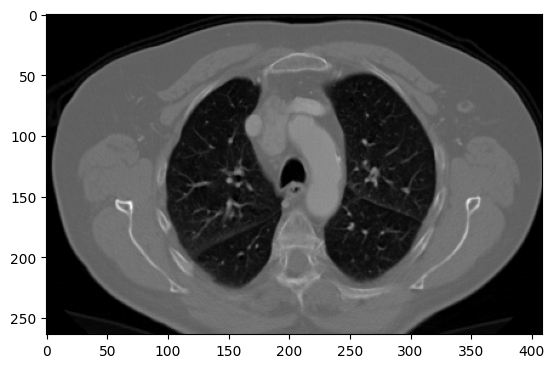

In [5]:
plt.imshow(image1)

In [32]:
train_dir = 'Chest CT-Scan images Dataset/Data/train'
test_dir = 'Chest CT-Scan images Dataset/Data/test'

In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.5,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(       
        train_dir,        
        target_size=(256, 256),
        batch_size=16,
        subset= 'training',
        class_mode='binary'
        )

val_generator = test_datagen.flow_from_directory(
     test_dir,
     target_size = (256, 256),
     batch_size = 16,
     #subset= 'validation',
     class_mode='binary' 
)

Found 614 images belonging to 2 classes.
Found 315 images belonging to 2 classes.


In [15]:
train_dir_lbp = 'Chest CT-Scan images Dataset/Data/train_lbp'
test_dir_lbp = 'Chest CT-Scan images Dataset/Data/test_lbp'

In [57]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.5,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_lbp = train_datagen.flow_from_directory(       
        train_dir_lbp,        
        target_size=(256, 256),
        batch_size=16,
        subset= 'training',
        class_mode='binary'
        )

val_generator_lbp = test_datagen.flow_from_directory(
     test_dir_lbp,
     target_size = (256, 256),
     batch_size = 16,
     #subset= 'validation',
     class_mode='binary' 
)

Found 613 images belonging to 2 classes.
Found 315 images belonging to 2 classes.


In [67]:
train_generator_lbp.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
def gen_flow_for_two_inputs(X1, X2, y):
    genX1 = gen.flow(X1,y,  batch_size=batch_size,seed=666)
    genX2 = gen.flow(X1,X2, batch_size=batch_size,seed=666)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            #Assert arrays are equal - this was for peace of mind, but slows down training
            #np.testing.assert_array_equal(X1i[0],X2i[0])
            yield [X1i[0], X2i[1]], X1i[1]

# Finally create generator
gen_flow = gen_flow_for_two_inputs(X_train, X_angle_train, y_train)

In [56]:
'''
i = 0
for filename in os.listdir('Chest CT-Scan images Dataset/Data/train/cancer'): 
    if(filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg")):
        img2 = cv2.imread('Chest CT-Scan images Dataset/Data/train/cancer/'+filename)
        image_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        lbp = local_binary_pattern(image_gray2, 12, 4, 'uniform')
        cv2.imwrite('Chest CT-Scan images Dataset/Data/train_lbp/cancer/'+str(i)+'train_lbp_cancer.png', lbp)
        i = i + 1
print(i) 
'''

465


In [53]:
'''
i = 0
list = []
for filename in os.listdir('Chest CT-Scan images Dataset/Data/train/cancer'): 
    if(filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg")):
        continue
    else:
        list.append(filename)
        i = i + 1

print(i)
'''

1


In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [38]:
model.save('Model.h5')

In [59]:
model1 = load_model('Model.h5')

In [60]:
model2 = load_model('Model2.h5')